# Healthcare Data Analysis
##### In this Jupyter Notebook, data cleaning, descriptive statistics, correlations, trends, and insights are thoroughly covered using the healthcare dataset.

##### Import Python Libraries for data analysis and visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("healthcare_dataset.csv.zip")
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

#### Observations:
##### The dataset contains 15 columns and 55,500 rows.
##### It has a mix of categorical (e.g., Gender, Medical Condition) and numerical (e.g., Age, Billing Amount) data.
##### No missing values, but some data cleaning may be required.

# Data Cleaning
##### For accuracy in analysis, dataset is cleaned.

In [8]:
# Convert date columns to datetime
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors='coerce')
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors='coerce')

# Remove duplicates
df = df.drop_duplicates()

# Fix negative billing amounts (assuming errors)
df["Billing Amount"] = df["Billing Amount"].abs()

# Standardize text formatting
df["Name"] = df["Name"].str.title()
df["Hospital"] = df["Hospital"].str.title()
df["Doctor"] = df["Doctor"].str.title()
df["Medical Condition"] = df["Medical Condition"].str.title()


# Summary Statistics
##### Numerical Data Overview

In [10]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,54966.000000,54966,54966.000000,54966.000000,54966
mean,51.535185,2021-11-01 17:35:29.505512448,25546.244286,301.124404,2021-11-17 05:34:28.202161408
min,13.000000,2019-05-08 00:00:00,9.238787,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13243.718641,202.000000,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25542.749145,302.000000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37819.858159,401.000000,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.605661,NaN,14204.924891,115.223143,NaN


# Observations:
##### Age Range: 13 to 89 years (mean ~51).
##### Billing Amount: Ranges from 2,008 to 52,764.
##### Room Number: Between 101 and 500.

# Categorical Data Overview

In [13]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,54966,54966,54966,54966,54966,54966,54966,54966,54966,54966
unique,40235,2,8,6,40341,39876,5,3,5,3
top,Michael Williams,Male,A-,Arthritis,Michael Smith,Llc Smith,Cigna,Elective,Lipitor,Abnormal
freq,24,27496,6898,9218,27,44,11139,18473,11038,18437


# Observations:
##### Gender: 2 unique values (Male/Female).
##### Medical Conditions: 6 categories (e.g., Cancer, Diabetes, Arthritis).
##### Admission Type: 3 types (Elective, Emergency, Urgent).
##### Most common insurance provider: Cigna.

# Data Distribution Analysis
### Age Distribution

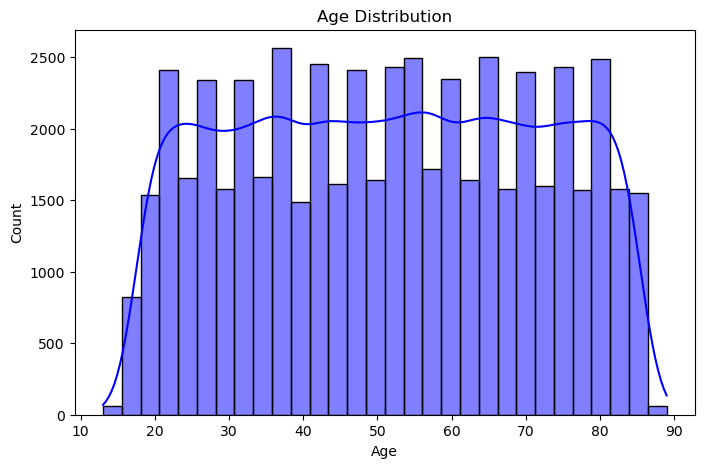

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Observation:
##### Most patients are aged 30-70, peaking around 50 years.

# Billing Amount Distribution

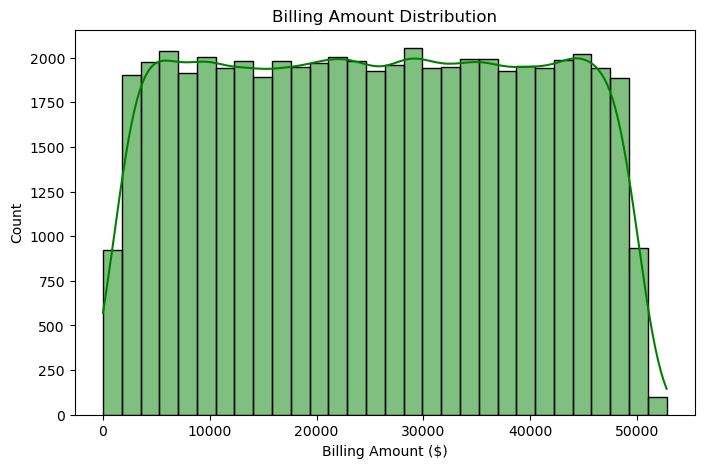

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Billing Amount"], bins=30, kde=True, color='green')
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount ($)")
plt.ylabel("Count")
plt.show()

# Observation:
##### Majority of billing amounts are below $40,000, but outliers exist.

# Admission Type Distribution

C:\Users\erwin\AppData\Local\Temp\ipykernel_21168\1983147707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Admission Type"], order=df["Admission Type"].value_counts().index, palette="coolwarm")


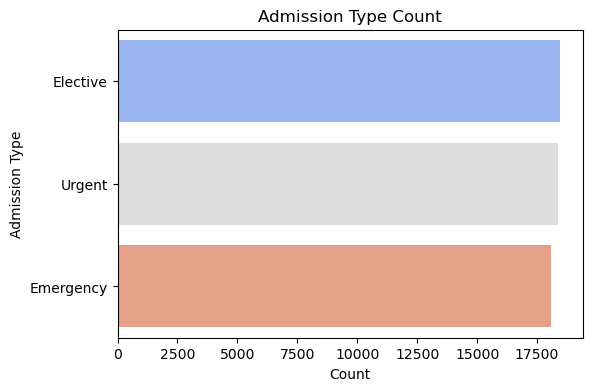

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(y=df["Admission Type"], order=df["Admission Type"].value_counts().index, palette="coolwarm")
plt.title("Admission Type Count")
plt.xlabel("Count")
plt.ylabel("Admission Type")
plt.show()

# Observation:
##### Elective admissions are most common, followed by Urgent.

# Relationship Analysis
Does Age Impact Billing Amount?

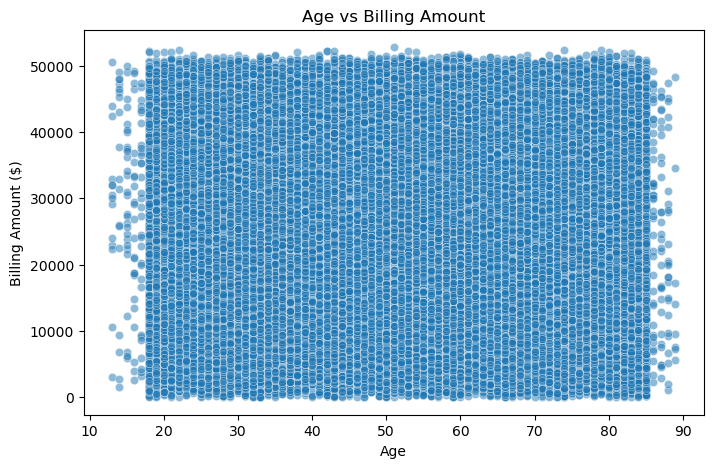

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Billing Amount"], alpha=0.5)
plt.title("Age vs Billing Amount")
plt.xlabel("Age")
plt.ylabel("Billing Amount ($)")
plt.show()

# Observation:
##### No clear trend, but some older patients have higher billing amounts.

# Hospital-wise Billing Analysis

C:\Users\erwin\AppData\Local\Temp\ipykernel_21168\472207402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_hospitals.index, x=top_hospitals.values, palette="viridis")


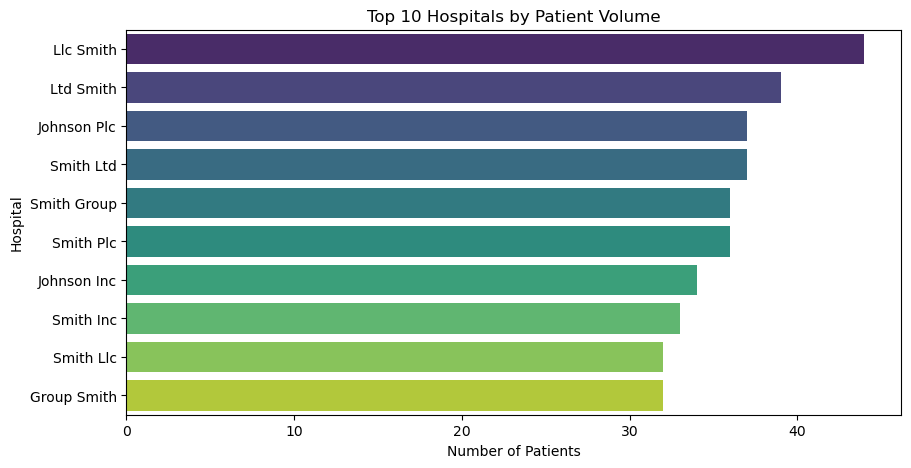

In [28]:
plt.figure(figsize=(10, 5))
top_hospitals = df["Hospital"].value_counts().head(10)
sns.barplot(y=top_hospitals.index, x=top_hospitals.values, palette="viridis")
plt.title("Top 10 Hospitals by Patient Volume")
plt.xlabel("Number of Patients")
plt.ylabel("Hospital")
plt.show()

# Observation:
##### Some hospitals handle a much higher number of patients, which may indicate better reputation or larger capacity.

# Stay Duration vs Admission Type

C:\Users\erwin\AppData\Local\Temp\ipykernel_21168\970356789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Admission Type"], y=df["Stay Duration"], palette="coolwarm")


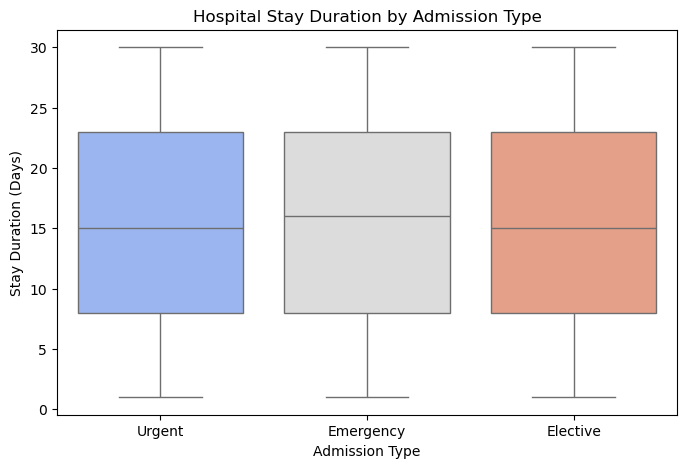

In [31]:
df["Stay Duration"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Admission Type"], y=df["Stay Duration"], palette="coolwarm")
plt.title("Hospital Stay Duration by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Stay Duration (Days)")
plt.show()

# Observations:
##### Emergency cases tend to have longer hospital stays.
##### Elective cases have shorter stays.

# Insurance Provider Impact on Billing Amount

C:\Users\erwin\AppData\Local\Temp\ipykernel_21168\878909013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Insurance Provider"], y=df["Billing Amount"], palette="Set2")


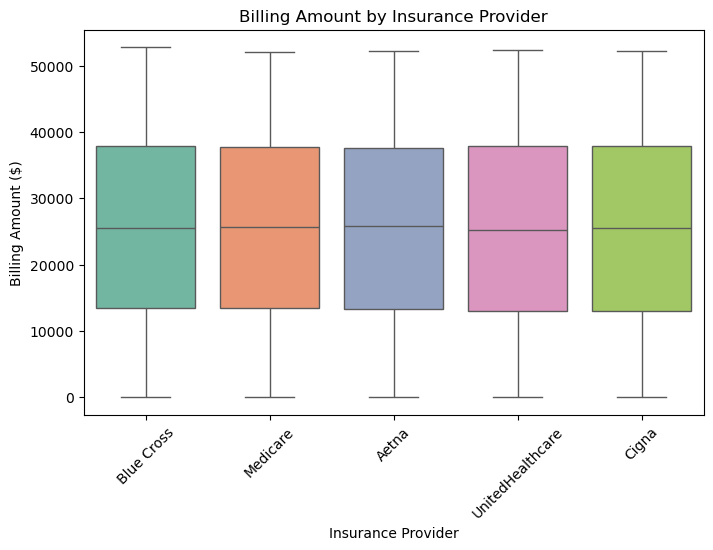

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Insurance Provider"], y=df["Billing Amount"], palette="Set2")
plt.xticks(rotation=45)
plt.title("Billing Amount by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Billing Amount ($)")
plt.show()

# Observation:
##### Some insurance providers cover higher-cost treatments, which could indicate different coverage policies.

# Key Business Insights
##### -1. Patient Demographics:

##### Majority are 30-70 years old, with an average of 51 years.
##### Elective admissions are the most common.

##### -2. Hospital & Insurance Trends:

##### Some hospitals have significantly more patients.
##### Cigna & Medicare are the leading insurance providers.

##### -3. Medical & Cost Trends:

##### Emergency admissions lead to longer hospital stays.
##### Older patients tend to have higher billing amounts.